# CTJ Tutorial

## 1. Get Started

First of all, you need to import the CTJ algorithm.

In [1]:
from CTJ import CTJ

Then you need to define the names of the items you want to assess, their true values if you know them, and the worst and best items to bound the value of your items.

In [21]:
colors      = ['g1', 'g2', 'g3', 'g4', 'g5']  # The names of the items
true_values = [160, 106, 209, 80, 135]  # Their true values

worst       = [0, 'black']  # Lower bound
best        = [255, 'white']  # Upper bound

You can now execute the `CTJ` algorithm.

In [3]:
CTJ(worst, best, colors, true_values = true_values)

| Result of CTJ algorithm
| Items :  ['g1', 'g2', 'g3', 'g4', 'g5', 'black', 'white']
| True values :  [160, 106, 209, 80, 135, 0, 255]
| Estimated values :  [165, 101, 210, 76, 133, 0, 255]
| Accuracy :  0.9983785300412382
| Iteration :  6


([165, 101, 210, 76, 133, 0, 255],
 6,
 0.9983785300412382,
 0,
 0.0009832382202148438)

If the bound values are included in the item list, the algorithm will still work.

In [4]:
colors      = ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']
true_values =  [0, 160, 106, 209, 80, 135, 255]

CTJ(worst, best, colors, true_values = true_values)

| Result of CTJ algorithm
| Items :  ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']
| True values :  [0, 160, 106, 209, 80, 135, 255]
| Estimated values :  [0, 152, 101, 204, 81, 127, 255]
| Accuracy :  0.9957096681412899
| Iteration :  6


([0, 152, 101, 204, 81, 127, 255], 6, 0.9957096681412899, 0, 0.0)

## 2. Introduce bias in automated judgments.

You can also introduce the sensibility of the judge. Here it's equal to (2,3,0.3).

The first value of the tuple represents the gap on the scale between values that the judge could invert, the second represents the absolute value of the mistake that the judge could make on the scale, and the third is the probability of making a mistake.

In [5]:
CTJ(worst, best, colors, true_values = true_values, sensibility = (2,3,0.3))

| Result of CTJ algorithm
| Items :  ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']
| True values :  [0, 160, 106, 209, 80, 135, 255]
| Estimated values :  [0, 159, 94, 214, 75, 128, 255]
| Accuracy :  0.9945432007258693
| Number of bias :  4
| Iteration :  7


([0, 159, 94, 214, 75, 128, 255], 7, 0.9945432007258693, 4, 0.0)

## 3. Human assessments

Now we will see how we can make the assessment ourselves.

Your Python script MUST be in the same directory as your PNG images, corresponding to each item.

For example, if `items = ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']` and your script is named `myscript.py`, then you need to have this directory structure:

```
Your/Project/Folder/
    ├── myscript.py
    ├── black.png
    ├── g1.png
    ├── g2.png
    ├── g3.png
    ├── g4.png
    ├── g5.png
    └── white.png
```

Then you need to code or import an assessment method.

Here, we will use the assessment method that is provided in the package.

In [3]:
from CTJ import _ctj_assessment_method

The assessment looks like this.

You need to click on two items to switch their position, then use the scaler to set the distance between the closest items, and finally click on the button to end the assessment.

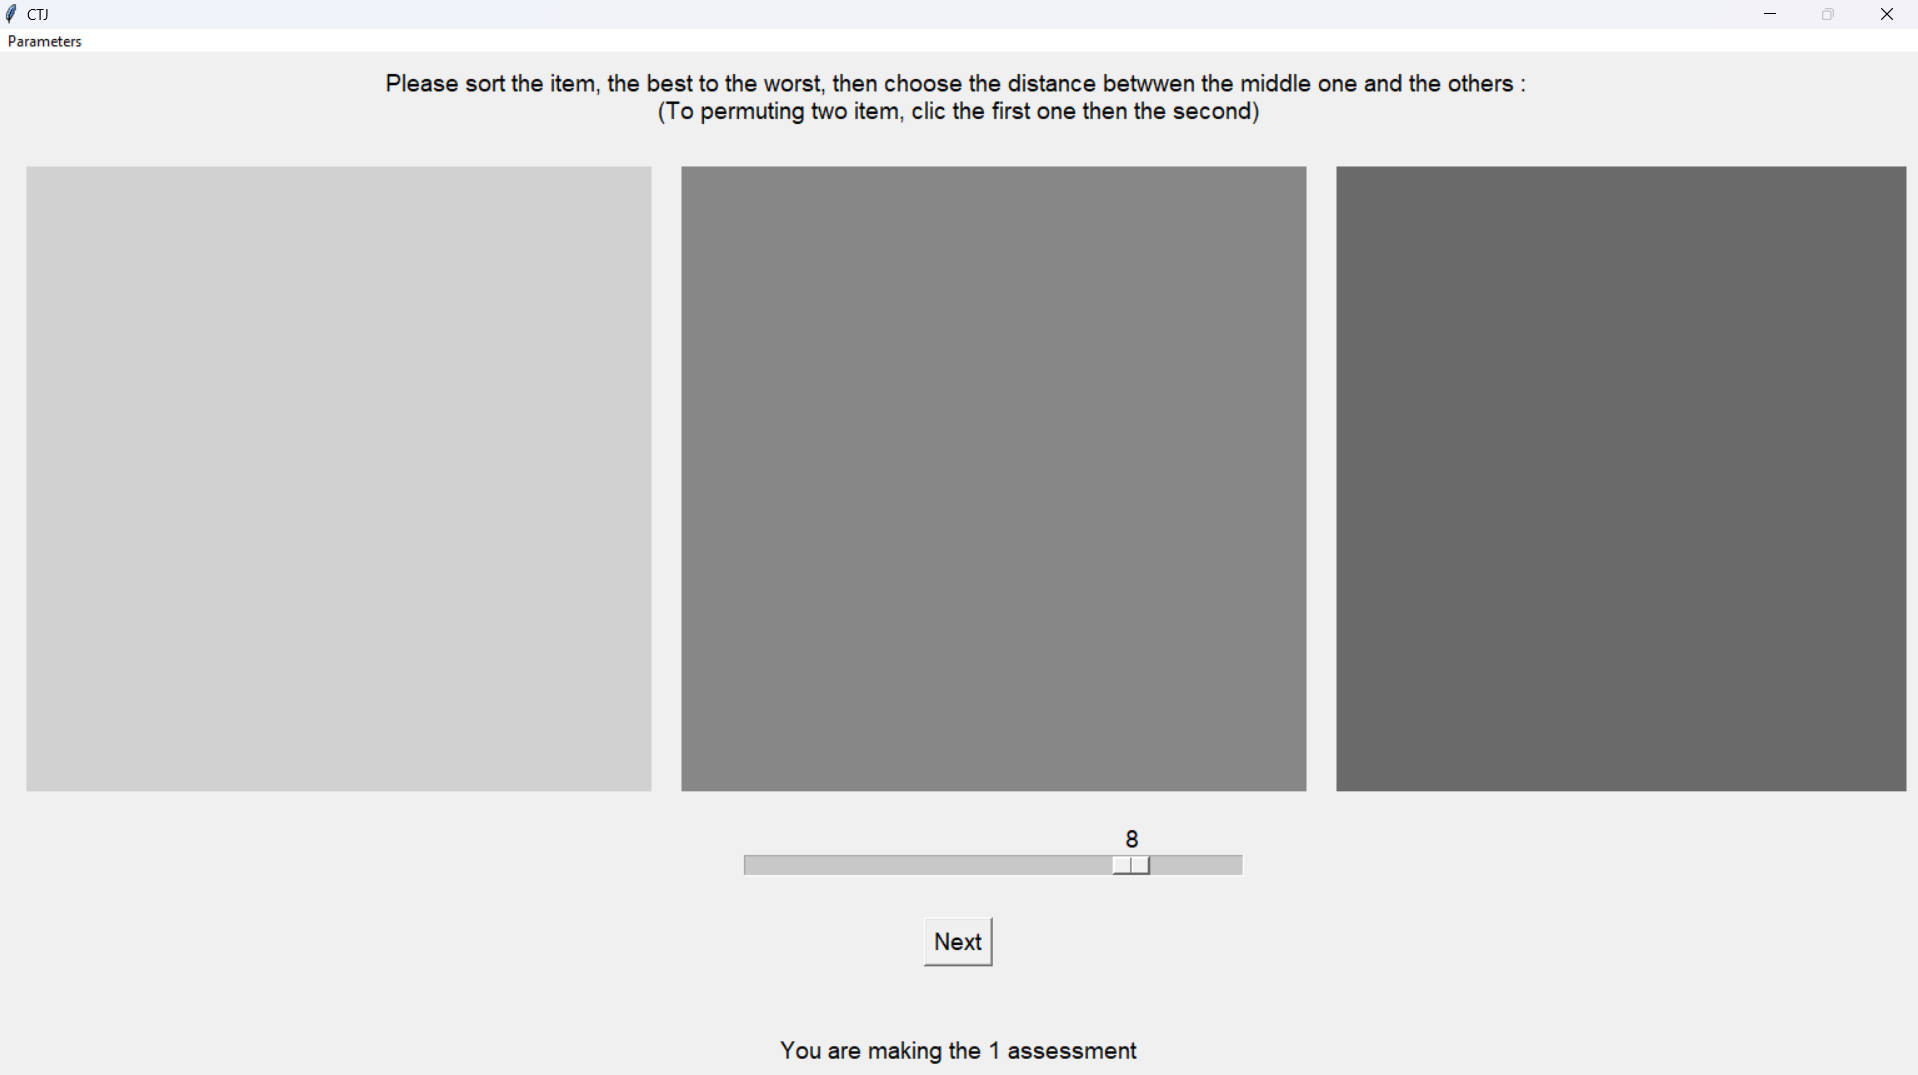

### 3.1 Use true values

We could use the true values to obtain the accuracy of the judgment method.

In [7]:
CTJ(worst, best, colors, true_values = true_values, assessment_method = _ctj_assessment_method)

| Result of CTJ algorithm
| Items :  ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']
| True values :  [0, 160, 106, 209, 80, 135, 255]
| Estimated values :  [0, 145, 91, 182, 61, 102, 255]
| Accuracy :  0.9370114045536069
| Iteration :  7
| Total duration :  44.315406799316406


([0, 145, 91, 182, 61, 102, 255], 7, 0.9370114045536069, 0, 44.315406799316406)

### 3.2 Predict values without true values

Alternatively, we could solely rely on the assessment method to predict the value. In this case, the maximum accuracy corresponds to the convergence of the values, which we must adjust.e the assessment method to predict the value, in this case, the max accuracy correspond to the convergence of the value, we must change it.

In [8]:
CTJ(worst, best, colors, assessment_method = _ctj_assessment_method, max_accuracy = 0.99)

| Result of CTJ algorithm
| Items :  ['black', 'g1', 'g2', 'g3', 'g4', 'g5', 'white']
| Estimated values :  [0, 164, 129, 198, 122, 154, 255]
| Iteration :  7
| Total duration :  44.498308181762695


([0, 164, 129, 198, 122, 154, 255],
 7,
 0.9959358346342252,
 0,
 44.498308181762695)

## 4. More parameters

You can also change the `max_iteration`, to have a better convergence.

In [5]:
CTJ(worst, best, colors, max_iteration = 1, true_values = true_values)

| Result of CTJ algorithm
| Items :  ['g1', 'g2', 'g3', 'g4', 'g5', 'black', 'white']
| True values :  [160, 106, 209, 80, 135, 0, 255]
| Estimated values :  [51, 76, 79, 87, 0, 92, 255]
| Accuracy :  0
| Iteration :  4


([51, 76, 79, 87, 0, 92, 255], 4, 0, 0, 0.0)

The accuracy here is low, so we must increase the maximum number of iterations. (By default, it's 30).

You may notice that the number of iterations is higher than the maximum iteration given. This discrepancy occurs because the max_iteration parameter corresponds only to the iterations made beyond the number needed to initialize the algorithm (rounded up to the nearest integer of `len(items)/3`).

In [8]:
CTJ(worst, best, colors, max_iteration = 30, true_values = true_values)

| Result of CTJ algorithm
| Items :  ['g1', 'g2', 'g3', 'g4', 'g5', 'black', 'white']
| True values :  [160, 106, 209, 80, 135, 0, 255]
| Estimated values :  [153, 98, 203, 81, 128, 0, 255]
| Accuracy :  0.9952395598386986
| Iteration :  7


([153, 98, 203, 81, 128, 0, 255], 7, 0.9952395598386986, 0, 0.0)

You can also change the `scale` depending on the number of items that you have. By default it's 10.

In [20]:
CTJ(worst, best, colors, scale = 100, true_values = true_values)

| Result of CTJ algorithm
| Items :  ['g1', 'g2', 'g3', 'g4', 'g5', 'black', 'white']
| True values :  [160, 106, 209, 80, 135, 0, 255]
| Estimated values :  [160, 106, 209, 80, 135, 0, 255]
| Accuracy :  1.0
| Iteration :  7


([160, 106, 209, 80, 135, 0, 255], 7, 1.0, 0, 0.0010027885437011719)